<h1>1. Dividing input and output space into Fuzzy area</h1>

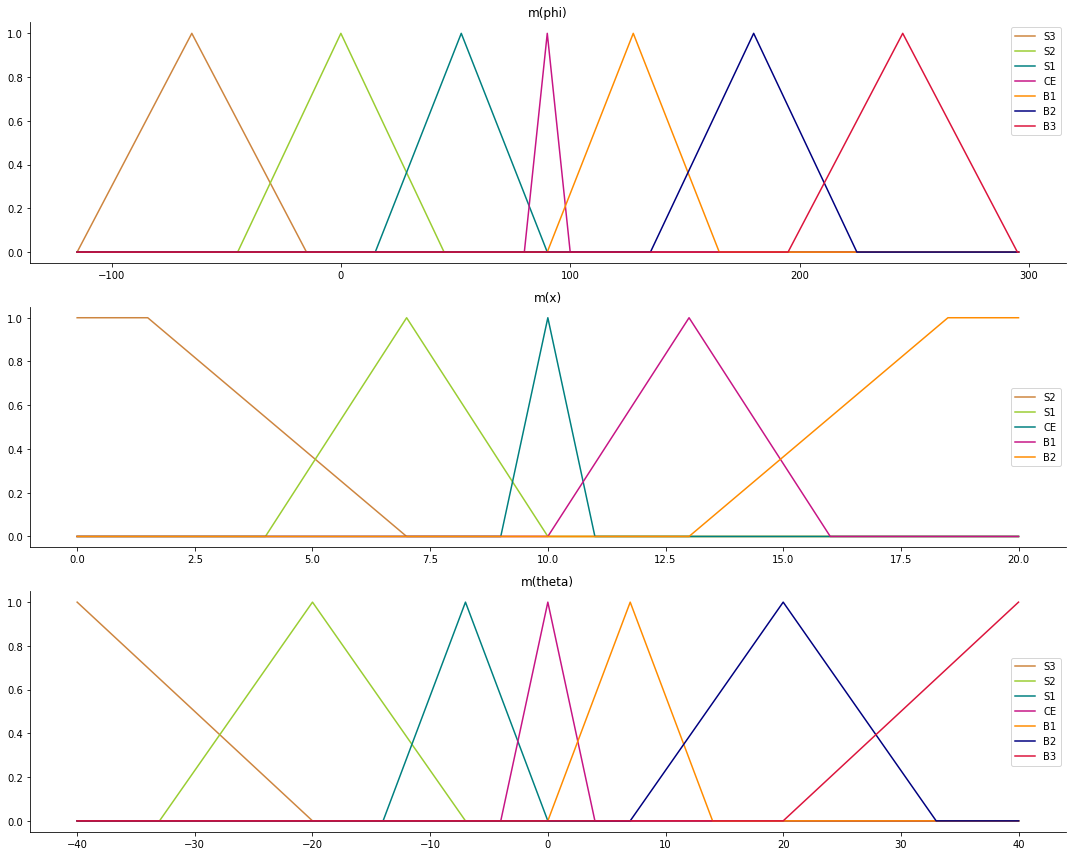

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import math
# Generate universe variables
x_phi = np.arange(-115, 296, .5)
x_x = np.arange(0, 20.5, 0.5)
x_theta  = np.arange(-40, 41, 1)

#
phi_MF = np.zeros((7, 822))
phi_MF_name = ['S3','S2','S1','CE','B1','B2','B3']

x_MF = np.zeros((5, 41))
x_MF_name = ['S2','S1','CE','B1','B2']

theta_MF = np.zeros((7, 81))
theta_MF_name = ['S3','S2','S1','CE','B1','B2','B3']

# Generate fuzzy membership functions
phi_MF[0] = fuzz.trimf(x_phi, [-115, -65, -15])
phi_MF[1] = fuzz.trimf(x_phi, [-45, 0, 45])
phi_MF[2] = fuzz.trimf(x_phi, [15, (15+90)/2, 90])
phi_MF[3] = fuzz.trimf(x_phi, [80, 90, 100])
phi_MF[4] = fuzz.trimf(x_phi, [90, (90+165)/2, 165])
phi_MF[5] = fuzz.trimf(x_phi, [135, 180, 225])
phi_MF[6] = fuzz.trimf(x_phi, [195, 245, 295])

x_MF[0] = fuzz.trapmf(x_x, [0, 0, 1.5, 7])
x_MF[1] = fuzz.trimf(x_x, [4, 7, 10])
x_MF[2] = fuzz.trimf(x_x, [9, 10, 11])
x_MF[3] = fuzz.trimf(x_x, [10, 13, 16])
x_MF[4] = fuzz.trapmf(x_x, [13, 18.5, 20, 20])

theta_MF[0] = fuzz.trimf(x_theta, [-40, -40, -20])
theta_MF[1] = fuzz.trimf(x_theta, [-33, -20, -7])
theta_MF[2] = fuzz.trimf(x_theta, [-14, -7, 0])
theta_MF[3] = fuzz.trimf(x_theta, [-4, 0, 4])
theta_MF[4] = fuzz.trimf(x_theta, [0, 7, 14])
theta_MF[5] = fuzz.trimf(x_theta, [7, 20, 33])
theta_MF[6] = fuzz.trimf(x_theta, [20, 40, 40])

# Visualize these universes and membership functions
colors = ['peru','yellowgreen','teal','mediumvioletred','darkorange','navy','crimson']
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 12))

for i in range(7):
    ax0.plot(x_phi, phi_MF[i], colors[i], linewidth=1.5, label=phi_MF_name[i])
ax0.set_title('m(phi)')
ax0.legend()

for i in range(5):
    ax1.plot(x_x, x_MF[i], colors[i], linewidth=1.5, label=x_MF_name[i])
ax1.set_title('m(x)')
ax1.legend()

for i in range(7):
    ax2.plot(x_theta, theta_MF[i], colors[i], linewidth=1.5, label=theta_MF_name[i])
ax2.set_title('m(theta)')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

<h2>2. <ul>
            <li>Importing dataset</li>
            <li>Creating Fuzzy rules</li>
            <li>Calculating degree for each rule</li>
        </ul>
</h2>

In [3]:
import pandas as pd
rules = np.zeros((5,7))
rules_deg = np.zeros((5,7))
for k in range(14):
    path = "dataset/"+str(k+1)+".csv"
    dataframe = pd.read_csv(path, sep = ',')
    dataframe.fillna(0, inplace = True)
    dataset = dataframe.values
    X = dataset[:,:2].astype(float)
    Y = dataset[:,2].astype(int)
    n = len(X)
    x_fire = np.zeros(5)
    phi_fire = np.zeros(7)
    theta_fire = np.zeros(7)
    for i in range(n):
        for j in range(5):
            x_fire[j] = fuzz.interp_membership(x_x, x_MF[j], X[i][0])
        for j in range(7):
            phi_fire[j] = fuzz.interp_membership(x_phi, phi_MF[j], X[i][1])
            theta_fire[j] = fuzz.interp_membership(x_theta, theta_MF[j], Y[i])
        x = np.argmax(x_fire)
        phi = np.argmax(phi_fire)
        theta = np.argmax(theta_fire)
        deg = x_fire[x] * phi_fire[phi] * theta_fire[theta]
        if deg > rules_deg[x][phi]:
            rules[x][phi] = theta
            rules_deg[x][phi] = deg
            

<h1>Showing Rules</h1>

In [4]:
k = 1
for i in range(5):
    for j in range(7):
        if rules_deg[i][j] != 0:
            print(k,"if x is ",x_MF_name[i],"and phi is ",phi_MF_name[j],
                  "then theta is",theta_MF_name[int(rules[i][j])]," : ",rules_deg[i][j])
            k = k + 1
            

1 if x is  S2 and phi is  S3 then theta is S3  :  0.35532
2 if x is  S2 and phi is  S2 then theta is S2  :  0.9230769230769231
3 if x is  S2 and phi is  S1 then theta is B1  :  0.5943073246753248
4 if x is  S2 and phi is  CE then theta is B2  :  0.8461538461538461
5 if x is  S2 and phi is  B1 then theta is B3  :  0.1986133333333333
6 if x is  S1 and phi is  S3 then theta is S3  :  0.7619791666666667
7 if x is  S1 and phi is  S2 then theta is S3  :  1.0
8 if x is  S1 and phi is  S1 then theta is S1  :  0.6065592380952382
9 if x is  S1 and phi is  CE then theta is B2  :  0.38461538461538464
10 if x is  S1 and phi is  B1 then theta is B3  :  0.3626304000000001
11 if x is  S1 and phi is  B2 then theta is B3  :  1.0
12 if x is  CE and phi is  S2 then theta is S3  :  0.7213566666666672
13 if x is  CE and phi is  S1 then theta is S2  :  0.4541706666666668
14 if x is  CE and phi is  CE then theta is CE  :  0.9207000000000002
15 if x is  CE and phi is  B1 then theta is B2  :  0.4946953846153841

<h1>Defining 3 functions</h1>
<h2>
    <ul>
        <li>"Conclusion" for calculating theta for each x & phi</li>
        <li>"find_next_x_phi" for calculating next x & phi from current x & phi & theta</li>
        <li>"move" for moving to the destination(x=10 & phi=90)</li>
    </ul>
</h2>

In [5]:

def conclusion(x,phi,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules):
    m_sum=0
    my_sum=0
    for i in range(5):
        for j in range(7):
            if rules_deg[i][j] != 0:
                m = fuzz.interp_membership(x_x, x_MF[i], x) * fuzz.interp_membership(x_phi, phi_MF[j], phi)
                m_sum += m
                l = np.fmin(fuzz.interp_membership(x_x, x_MF[i], x),
                           fuzz.interp_membership(x_phi, phi_MF[j], phi))
                o = np.fmin(theta_MF[int(rules[i][j])], l)
                my_sum += m * fuzz.defuzz(x_theta, o,"mom")
    return my_sum / m_sum

def find_next_x_phi(x,phi,theta):
    new_x = x + math.cos(math.radians(phi + theta)) + math.sin(math.radians(phi)) * math.sin(math.radians(theta))
    new_phi = phi - math.asin((2 * math.sin(math.radians(theta))) / 4) * 180 / math.pi
    return (new_x,new_phi)
            
    
    
def move(x,phi,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules):
    X=[]
    theta = conclusion(x,phi,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules) 
    X.append(x)
    (new_x,new_phi) = find_next_x_phi(x,phi,theta)
    X.append(new_x)
    print("X : {}, Phi : {}, Theta : {}".format(new_x,new_phi,theta))
    k=0
    while(k<=100):
        theta = conclusion(new_x,new_phi,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules) 
        (new_x,new_phi) = find_next_x_phi(new_x,new_phi,theta)
        X.append(new_x)
        print("X : {}, Phi : {}, Theta : {}".format(new_x,new_phi,theta))
        k+=1
        if (new_x>9.999 and new_x<10.001) and (new_phi > 89.999 and new_phi < 91.001):
            break
    return X
    



<h1>Start from x=1 & alpha=45 with entire dataset</h1>

X : 1.70183611446619, Phi : 41.50653631501049, Theta : 7.0
X : 2.4485806677450395, Phi : 39.34405808985192, Theta : 4.3280445737607725
X : 3.221124934457734, Phi : 38.03418614088437, Theta : 2.6204291317087622
X : 4.008474282592461, Phi : 37.25159754766334, Theta : 1.5653232349418598
X : 4.80436994720672, Phi : 36.82209797526265, Theta : 0.8590232819326873
X : 5.601993216715731, Phi : 39.24947289084932, Theta : -4.85912034698859
X : 6.37116462151042, Phi : 42.57425970690841, Theta : -6.660835667481389
X : 7.102238543511846, Phi : 46.01596303437076, Theta : -6.895904370639089
X : 7.791520089441613, Phi : 49.50942671936027, Theta : -7.0
X : 8.436003066778136, Phi : 53.00289040434978, Theta : -7.0
X : 9.03329226273079, Phi : 56.496354089339285, Theta : -7.0
X : 9.579615036230122, Phi : 60.5944475872052, Theta : -8.217342100419925
X : 10.047958590887188, Phi : 69.22687369948244, Theta : -17.469003142040552
X : 10.380869286055988, Phi : 79.15607932016223, Theta : -20.173399050865612
X : 10.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


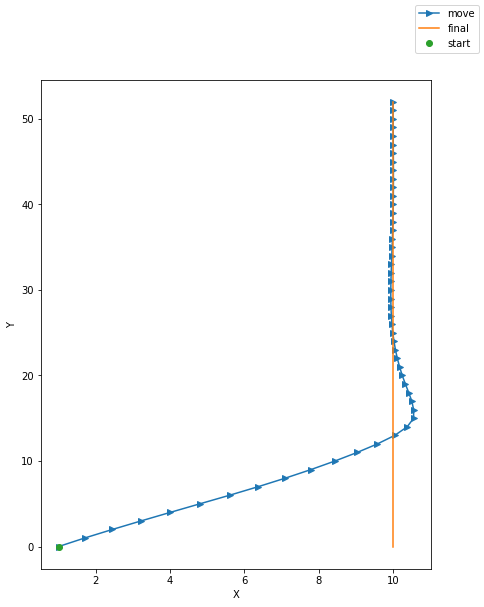

In [6]:
X = move(1,45,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h1>Start from x=7 & alpha=135 with entire dataset</h1>

X : 6.442792252476766, Phi : 117.07145080478992, Theta : 38.0
X : 6.078550152728202, Phi : 99.62802805792285, Theta : 36.83608576721748
X : 5.935466648263554, Phi : 84.62320835706754, Theta : 31.184835062784707
X : 6.026238586999452, Phi : 77.49326897774876, Theta : 14.37338811852234
X : 6.242240751931088, Phi : 79.53813349153643, Theta : -4.09233949370537
X : 6.423179420500355, Phi : 81.94648965140118, Theta : -4.820980697628757
X : 6.562325995396314, Phi : 78.61177138147626, Theta : 6.680800203563447
X : 6.758768733504387, Phi : 81.51143835250942, Theta : -5.806794174336919
X : 6.905985734932025, Phi : 79.41669442920504, Theta : 4.192294347828801
X : 7.088374869112101, Phi : 82.78943165401705, Theta : -6.757232844108214
X : 7.212351695489823, Phi : 78.31188326109427, Theta : 8.982737881602667
X : 7.413425861792393, Phi : 81.80534694608377, Theta : -7.0
X : 7.555372454076662, Phi : 79.2006312344834, Theta : 5.214834122236054
X : 7.741346315435698, Phi : 82.6940949194729, Theta : -7.00

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


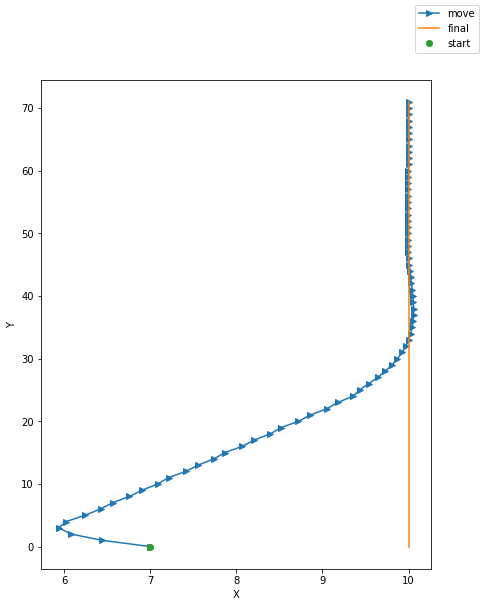

In [7]:
X = move(7,135,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h1>Start from x=13 & alpha=135 with entire dataset</h1>

X : 12.29816388553381, Phi : 131.5065363150105, Theta : 7.0
X : 11.64039810678939, Phi : 128.013072630021, Theta : 7.0
X : 11.029147241919905, Phi : 124.51960894503148, Theta : 7.0
X : 10.466682996992551, Phi : 121.02614526004197, Theta : 6.999999999999999
X : 9.97394524188282, Phi : 112.58908259242062, Theta : 17.064367012617794
X : 9.613204341354132, Phi : 102.69828538736093, Theta : 20.09280363763071
X : 9.409390545326001, Phi : 91.90382541096663, Theta : 21.99790366834926
X : 9.37645302602094, Phi : 88.16074826170063, Theta : 7.502249754847819
X : 9.40838196771202, Phi : 85.24484233931177, Theta : 5.839398503056455
X : 9.491220155575272, Phi : 84.15748132532543, Theta : 2.1751139050598667
X : 9.593004576668534, Phi : 84.5618326811332, Theta : -0.8087228520716129
X : 9.68774715846066, Phi : 85.26927762792516, Theta : -1.414997775480507
X : 9.770195012487198, Phi : 85.9752727787569, Theta : -1.412097521540804
X : 9.840363018341554, Phi : 86.64150440184996, Theta : -1.332553347939639


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


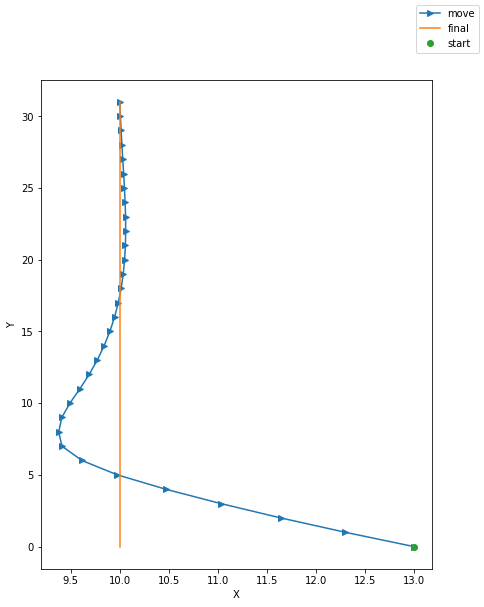

In [8]:
X = move(13,135,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h2>    <ul>
            <li>Importing 3 row of each dataset</li>
            <li>Creating Fuzzy rules</li>
            <li>Calculating degree for each rule</li>
        </ul>
</h2>

In [9]:
rules = np.zeros((5,7))
rules_deg = np.zeros((5,7))
for k in range(14):
    path = "dataset/"+str(k+1)+".csv"
    dataframe = pd.read_csv(path, sep = ',')
    dataframe.fillna(0, inplace = True)
    dataset = dataframe.values
    X = dataset[:3,:2].astype(float)
    Y = dataset[:3,2].astype(int)
    
    n = len(X)
    x_fire = np.zeros(5)
    phi_fire = np.zeros(7)
    theta_fire = np.zeros(7)
    for i in range(n):
        for j in range(5):
            x_fire[j] = fuzz.interp_membership(x_x, x_MF[j], X[i][0])
        for j in range(7):
            phi_fire[j] = fuzz.interp_membership(x_phi, phi_MF[j], X[i][1])
            theta_fire[j] = fuzz.interp_membership(x_theta, theta_MF[j], Y[i])
        x = np.argmax(x_fire)
        phi = np.argmax(phi_fire)
        theta = np.argmax(theta_fire)
        deg = x_fire[x] * phi_fire[phi] * theta_fire[theta]
        if deg > rules_deg[x][phi]:
            rules[x][phi] = theta
            rules_deg[x][phi] = deg
            

<h1>Showing Rules</h1>

In [10]:
k = 1
for i in range(5):
    for j in range(7):
        if rules_deg[i][j] != 0:
            print(k,"if x is ",x_MF_name[i],"and phi is ",phi_MF_name[j],
                  "then theta is",theta_MF_name[int(rules[i][j])]," : ",rules_deg[i][j])
            k = k + 1
            

1 if x is  S2 and phi is  S3 then theta is S3  :  0.35532
2 if x is  S2 and phi is  S2 then theta is S2  :  0.9230769230769231
3 if x is  S2 and phi is  S1 then theta is B2  :  0.241374358974359
4 if x is  S2 and phi is  CE then theta is B2  :  0.8461538461538461
5 if x is  S1 and phi is  S3 then theta is S3  :  0.7619791666666667
6 if x is  S1 and phi is  S2 then theta is S3  :  1.0
7 if x is  S1 and phi is  S1 then theta is S3  :  0.24632017777777787
8 if x is  S1 and phi is  CE then theta is B2  :  0.38461538461538464
9 if x is  S1 and phi is  B1 then theta is B3  :  0.18111253333333346
10 if x is  S1 and phi is  B2 then theta is B3  :  1.0
11 if x is  B1 and phi is  S2 then theta is S3  :  1.0
12 if x is  B1 and phi is  S1 then theta is S3  :  0.1811125333333334
13 if x is  B1 and phi is  CE then theta is S2  :  0.38461538461538464
14 if x is  B1 and phi is  B1 then theta is B3  :  0.2464327555555554
15 if x is  B1 and phi is  B2 then theta is B3  :  1.0
16 if x is  B1 and phi is  

<h1>Start from x=1 & alpha=45 with parted dataset</h1>

X : 1.6644630243886747, Phi : 35.15344806016592, Theta : 20.0
X : 2.473250071856741, Phi : 30.951719796895006, Theta : 8.426268110238523
X : 3.329620728615509, Phi : 29.41755194442058, Theta : 3.069437038316444
X : 4.200539164213984, Phi : 28.89493657996895, Theta : 1.0452742164086204
X : 5.074601811629587, Phi : 30.540178806318984, Theta : -3.29184299020613
X : 5.90319449463877, Phi : 38.38129225785426, Theta : -15.83410340552513
X : 6.618833796965255, Phi : 50.1559155646437, Theta : -24.087102618914674
X : 7.145833274859829, Phi : 66.67629517864793, Theta : -34.66050998371605
X : 7.464100668099713, Phi : 83.97848673710445, Theta : -36.5
X : 7.568595751632898, Phi : 81.45720530205662, Theta : 5.047461720967212
X : 7.7138875783531455, Phi : 87.43343746746189, Theta : -12.018751278807388
X : 7.756996862875871, Phi : 79.65736567942957, Theta : 15.700187533739584
X : 7.907566982403942, Phi : 95.45970407366411, Theta : -33.0
X : 7.819850725368753, Phi : 84.29116672460222, Theta : 22.792275

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


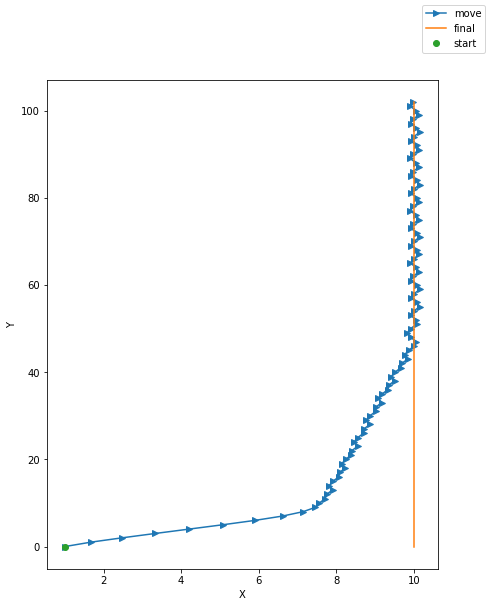

In [11]:
X = move(1,45,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h1>Start from x=7 & alpha=135 with parted dataset</h1>

X : 6.442792252476766, Phi : 117.07145080478992, Theta : 38.0
X : 6.0817361336192155, Phi : 99.35054070850126, Theta : 37.5
X : 5.940252182050117, Phi : 85.12075702087638, Theta : 29.447285357826672
X : 6.023461571436208, Phi : 79.17306023328757, Theta : 11.960723323270711
X : 6.19768120594188, Phi : 89.94754554904004, Theta : -21.955584871046767
X : 6.198541819836048, Phi : 80.12919776701555, Theta : 19.94086435961995
X : 6.357327750803279, Phi : 90.99115054517206, Theta : -22.140968327475562
X : 6.341100139764212, Phi : 81.01997868271297, Theta : 20.261496960949152
X : 6.493825574480455, Phi : 86.94663447894095, Theta : -11.917941582443952
X : 6.545232423486025, Phi : 79.42221984488994, Theta : 15.182671119508765
X : 6.706871819515477, Phi : 93.13137044982489, Theta : -28.293389106692008
X : 6.65591997218365, Phi : 82.74620574987432, Theta : 21.13268335704285
X : 6.7821845345455065, Phi : 82.78211725410561, Theta : -0.07182302257027004
X : 6.907824453599044, Phi : 82.97876533612735, 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


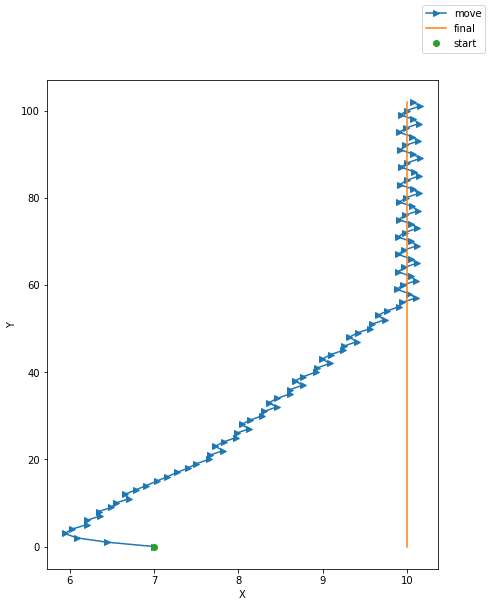

In [12]:
X = move(7,135,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h1>Start from x=13 & alpha=135 with parted dataset</h1>

X : 12.442792252476766, Phi : 117.07145080478992, Theta : 38.0
X : 12.081736133619215, Phi : 99.35054070850126, Theta : 37.5
X : 11.930725049731885, Phi : 88.71978980618383, Theta : 21.65135275569515
X : 11.951666424505195, Phi : 98.75480676508667, Theta : -20.39559846097801
X : 11.80413585860396, Phi : 91.69072105879228, Theta : 14.23850719514901
X : 11.77598174214765, Phi : 100.29029456105819, Theta : -17.40091112601195
X : 11.626165363612861, Phi : 84.48795616682365, Theta : 33.0
X : 11.71469072720862, Phi : 95.67760124335021, Theta : -22.837205535842234
X : 11.616398014881446, Phi : 98.9276836406198, Theta : -6.510681842905525
X : 11.467369559092528, Phi : 90.91073790624974, Theta : 16.196470545785072
X : 11.452312664844658, Phi : 100.12859444274139, Theta : -18.68576523562429
X : 11.304825704697098, Phi : 84.32625604850685, Theta : 33.0
X : 11.395756412289433, Phi : 95.64361239398387, Theta : -23.109297744276244
X : 11.298077312610868, Phi : 98.96224011507273, Theta : -6.648454758

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


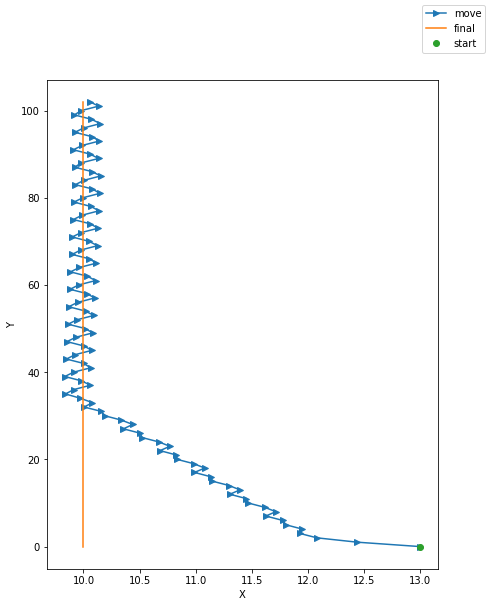

In [13]:
X = move(13,135,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<p>As you can see, truck moves is very noisy now and we have poor conclusion<br>diffrence between rules of Question1 and Question3 are those rules that have "x is CE"<br>
    so we add bellow rules to improve our conclusion

</p>

In [20]:
rules[2][1] = 0;
rules_deg[2][1] = 1;
rules[2][2] = 1;
rules_deg[2][2] = 1;
rules[2][3] = 3;
rules_deg[2][3] = 1;
rules[2][4] = 5;
rules_deg[2][4] = 1;
rules[2][5] = 6;
rules_deg[2][5] = 1;
for i in range(1,6):
    print("if x is ",x_MF_name[2],"and phi is ",phi_MF_name[i],
                  "then theta is",theta_MF_name[int(rules[2][i])]," : ",rules_deg[2][i])

if x is  CE and phi is  S2 then theta is S3  :  1.0
if x is  CE and phi is  S1 then theta is S2  :  1.0
if x is  CE and phi is  CE then theta is CE  :  1.0
if x is  CE and phi is  B1 then theta is B2  :  1.0
if x is  CE and phi is  B2 then theta is B3  :  1.0


<h1>Start from x=1 & alpha=45 with parted dataset & improvement rules</h1>

X : 1.6644630243886747, Phi : 35.15344806016592, Theta : 20.0
X : 2.473250071856741, Phi : 30.951719796895006, Theta : 8.426268110238523
X : 3.329620728615509, Phi : 29.41755194442058, Theta : 3.069437038316444
X : 4.200539164213984, Phi : 28.89493657996895, Theta : 1.0452742164086204
X : 5.074601811629587, Phi : 30.540178806318984, Theta : -3.29184299020613
X : 5.90319449463877, Phi : 38.38129225785426, Theta : -15.83410340552513
X : 6.618833796965255, Phi : 50.1559155646437, Theta : -24.087102618914674
X : 7.145833274859829, Phi : 66.67629517864793, Theta : -34.66050998371605
X : 7.464100668099713, Phi : 83.97848673710445, Theta : -36.5
X : 7.568595751632898, Phi : 81.45720530205662, Theta : 5.047461720967212
X : 7.7138875783531455, Phi : 87.43343746746189, Theta : -12.018751278807388
X : 7.756996862875871, Phi : 79.65736567942957, Theta : 15.700187533739584
X : 7.907566982403942, Phi : 95.45970407366411, Theta : -33.0
X : 7.819850725368753, Phi : 84.29116672460222, Theta : 22.792275

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


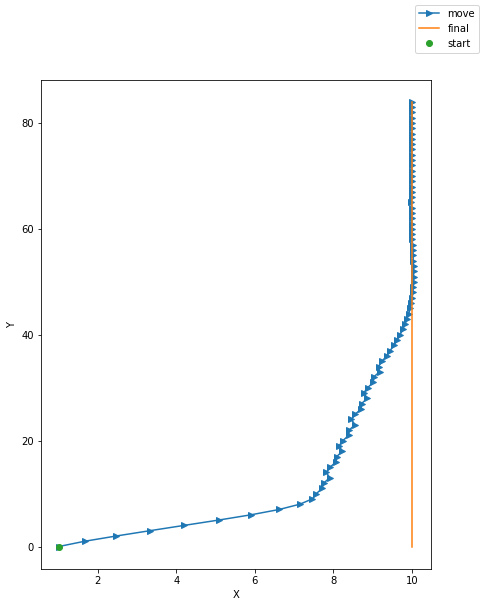

In [15]:
X = move(1,45,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h1>Start from x=7 & alpha=135 with parted dataset & improvement rules</h1>

X : 6.442792252476766, Phi : 117.07145080478992, Theta : 38.0
X : 6.0817361336192155, Phi : 99.35054070850126, Theta : 37.5
X : 5.940252182050117, Phi : 85.12075702087638, Theta : 29.447285357826672
X : 6.023461571436208, Phi : 79.17306023328757, Theta : 11.960723323270711
X : 6.19768120594188, Phi : 89.94754554904004, Theta : -21.955584871046767
X : 6.198541819836048, Phi : 80.12919776701555, Theta : 19.94086435961995
X : 6.357327750803279, Phi : 90.99115054517206, Theta : -22.140968327475562
X : 6.341100139764212, Phi : 81.01997868271297, Theta : 20.261496960949152
X : 6.493825574480455, Phi : 86.94663447894095, Theta : -11.917941582443952
X : 6.545232423486025, Phi : 79.42221984488994, Theta : 15.182671119508765
X : 6.706871819515477, Phi : 93.13137044982489, Theta : -28.293389106692008
X : 6.65591997218365, Phi : 82.74620574987432, Theta : 21.13268335704285
X : 6.7821845345455065, Phi : 82.78211725410561, Theta : -0.07182302257027004
X : 6.907824453599044, Phi : 82.97876533612735, 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


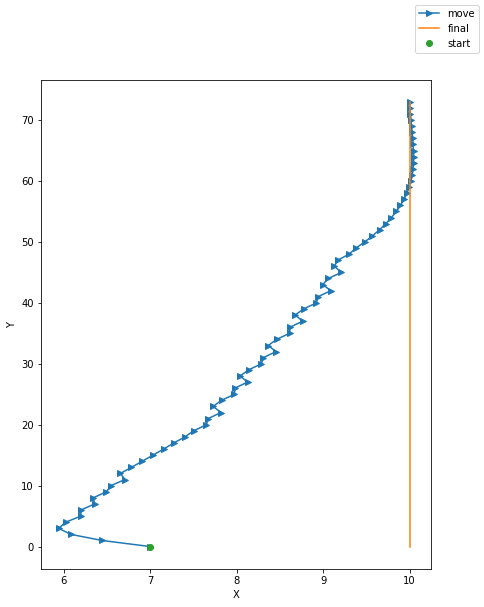

In [16]:
X = move(7,135,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()

<h1>Start from x=13 & alpha=135 with parted dataset & improvement rules</h1>

X : 12.442792252476766, Phi : 117.07145080478992, Theta : 38.0
X : 12.081736133619215, Phi : 99.35054070850126, Theta : 37.5
X : 11.930725049731885, Phi : 88.71978980618383, Theta : 21.65135275569515
X : 11.951666424505195, Phi : 98.75480676508667, Theta : -20.39559846097801
X : 11.80413585860396, Phi : 91.69072105879228, Theta : 14.23850719514901
X : 11.77598174214765, Phi : 100.29029456105819, Theta : -17.40091112601195
X : 11.626165363612861, Phi : 84.48795616682365, Theta : 33.0
X : 11.71469072720862, Phi : 95.67760124335021, Theta : -22.837205535842234
X : 11.616398014881446, Phi : 98.9276836406198, Theta : -6.510681842905525
X : 11.467369559092528, Phi : 90.91073790624974, Theta : 16.196470545785072
X : 11.452312664844658, Phi : 100.12859444274139, Theta : -18.68576523562429
X : 11.304825704697098, Phi : 84.32625604850685, Theta : 33.0
X : 11.395756412289433, Phi : 95.64361239398387, Theta : -23.109297744276244
X : 11.298077312610868, Phi : 98.96224011507273, Theta : -6.648454758

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


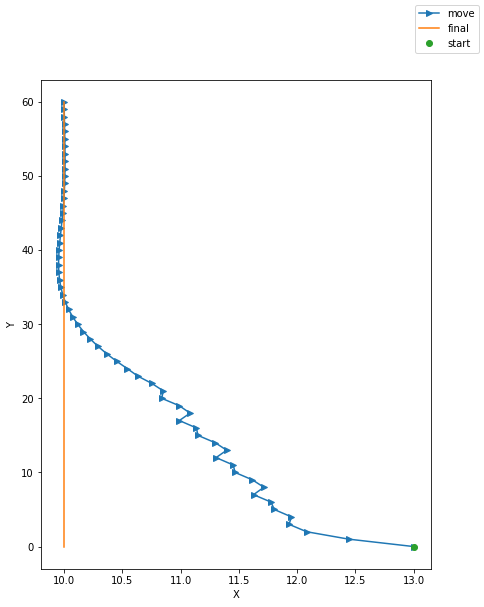

In [17]:
X = move(13,135,x_x, x_MF,x_phi, phi_MF,x_theta,theta_MF,rules)

fig,ax = plt.subplots(nrows=1, figsize=(7, 9))
ax.plot(X,range(len(X)),'->',label='move')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(np.full(len(X),10),range(len(X)),'-',label='final')
ax.plot(X[0],0,'o',label='start')
fig.legend()
fig.show()